In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


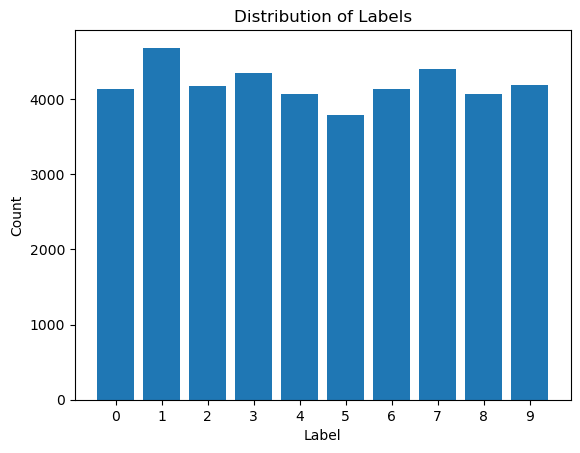

In [4]:
import matplotlib.pyplot as plt

# Getting the label counts from the DataFrame
label_counts = train_df['label'].value_counts()

# Creating a bar chart
plt.bar(label_counts.index, label_counts.values)

# Setting labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Set x-axis ticks
plt.xticks(list(label_counts.index))

# Show the plot
plt.show()


In [5]:
def image_row_reshaper(df, row_number, visualize=False, test_df = False):
    raw_image_data = df.loc[row_number,] 
    
    if test_df == False:
        image_label = raw_image_data[0] 
        filtered_image_data = raw_image_data[1:] 
    else:
        filtered_image_data = raw_image_data
        
    reshaped_image_data = filtered_image_data.values.reshape((28,28)) #Reshaping the image into 28 by 28 pixes
    
    if visualize==True:
        plt.imshow(reshaped_image_data, cmap='gray')
        if test_df == False:
            plt.title(f'Label: {image_label}')
        plt.show()
    else:
        return reshaped_image_data, image_label

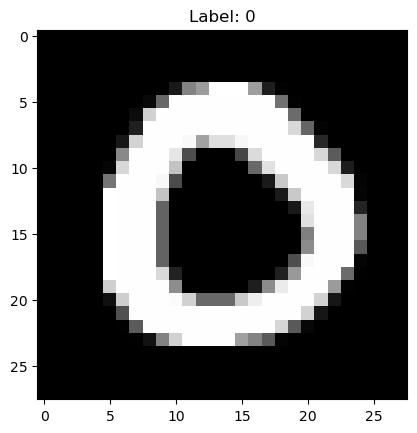

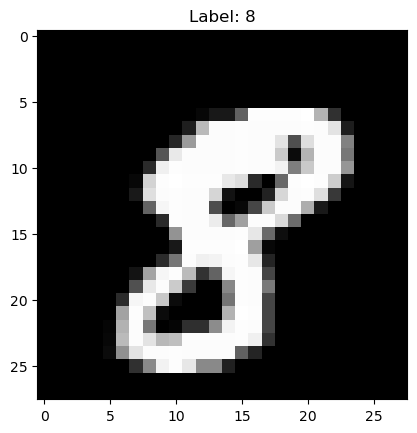

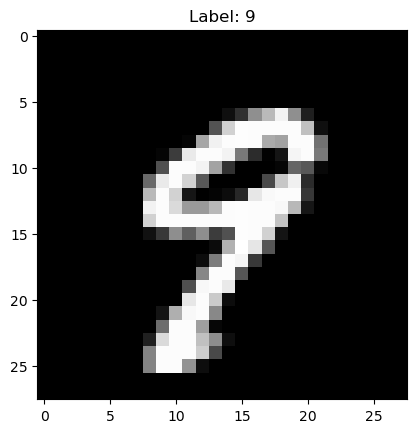

In [6]:
image_row_reshaper(train_df, 4, visualize=True)
image_row_reshaper(train_df, 10, visualize=True)
image_row_reshaper(train_df, 11, visualize=True)

In [7]:
train_df.shape

(42000, 785)

In [8]:
def dataframe_formatter(df, isTest=False):
    
    if isTest==False:
        y = df['label'] 
        X = train_df.loc[:,'pixel0':'pixel783'] # extracting the pixels data
        X = X.apply(lambda x: x/255) # normalizing between 0 and 1
        X = X.values.reshape(-1, 28, 28, 1)
        return X, y
        
    elif isTest==True:
        X = df
        X = X.apply(lambda x: x/255) # normalizing between 0 and 1
        X = X.values.reshape(-1, 28, 28, 1)
        return X

In [9]:
X_train, y_train = dataframe_formatter(train_df, isTest=False)

In [10]:
# Splitting the data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

# BUILDING MODEL

In [11]:
model = models.Sequential(
    [
        layers.Conv2D(20, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (2, 2), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(units=200, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        5792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:

stop_training = EarlyStopping(monitor='val_loss', patience=4)

In [14]:
# Train the model with 20 epochs
model.fit(
    X_train,
    y_train,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=stop_training
)

Epoch 1/20
1050/1050 [==============================] - 14s 5ms/step - loss: 0.2854 - accuracy: 0.9082 - val_loss: 0.0815 - val_accuracy: 0.9751
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0831 - accuracy: 0.9728 - val_loss: 0.0755 - val_accuracy: 0.9775
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0639 - accuracy: 0.9795 - val_loss: 0.0694 - val_accuracy: 0.9799
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9840 - val_loss: 0.0562 - val_accuracy: 0.9818
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0468 - val_accuracy: 0.9869
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0427 - val_accuracy

# IMPORTING DATA

In [15]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [16]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_df.shape

(28000, 784)

In [18]:
X_test = dataframe_formatter(test_df, isTest=True)

In [19]:
X_test.shape

(28000, 28, 28, 1)

In [20]:
# Perform predictions for all rows of X_test at once
predictions = model.predict(X_test, verbose=0)

# Get the predicted class labels by finding the indices of the maximum values
predicted_labels = np.argmax(predictions, axis=-1)


# Testing

In [21]:
def test_model(row):
    image_row_reshaper(test_df, row, visualize=True, test_df = True)
    print(f'Predicted Label: {predicted_labels[row]}')

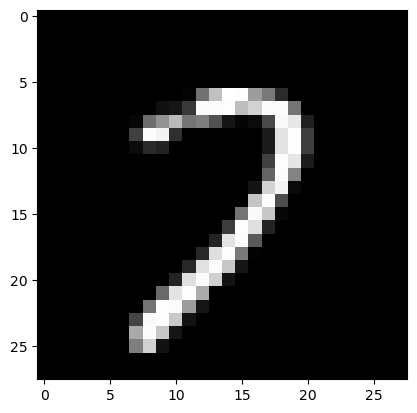

Predicted Label: 7


In [22]:
test_model(11)

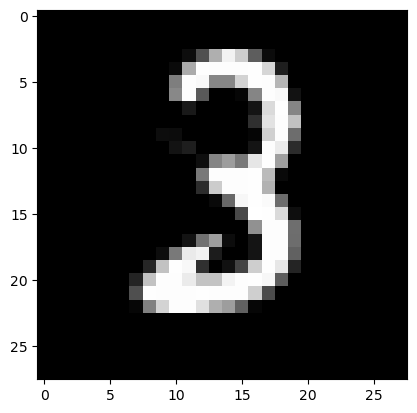

Predicted Label: 3


In [23]:
test_model(4)

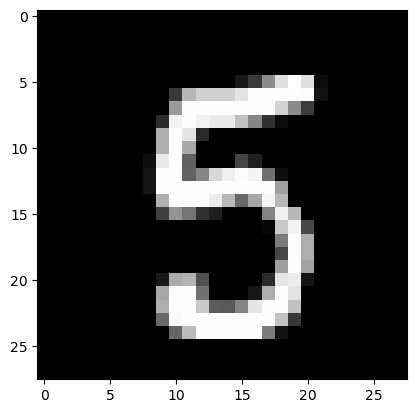

Predicted Label: 5


In [24]:
test_model(10)